Question 1

C4.5 Decession Tree Implementation

In [ ]:
#loading the packages
import os
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split

In [ ]:
#Creting the data frame

data = pd.DataFrame({"Refund":["Yes","Yes","Yes","Yes","Yes","Yes","Yes","No","No","No","No","No","No"],
                     "Status":["Single","Single","Single","Married","Married","Divorced","Divorced","Single","Single","Married","Married","Divorced","Divorced"],
                     "Tax Income":["115","60","40","130","80","130","80","75","65","125","80","90","95"],
                     "Cheat":["No","No","Yes","Yes","No","Yes","No","No","Yes","Yes","No","Yes","Yes"]},
                    columns=["Refund","Status","Tax Income","Cheat"])

features = data[["Refund","Status","Tax Income"]]
target = data["Cheat"]

data

,Refund,Status,Tax Income,Cheat
0,Yes,Single,115,No
1,Yes,Single,60,No
2,Yes,Single,40,Yes
3,Yes,Married,130,Yes
4,Yes,Married,80,No
5,Yes,Divorced,130,Yes
6,Yes,Divorced,80,No
7,No,Single,75,No
8,No,Single,65,Yes
9,No,Married,125,Yes


In [ ]:
#dicretization of features and target variables.
data['Refund'],_ = pd.factorize(data['Refund'])
data['Status'],_ = pd.factorize(data['Status'])
data['Tax Income'],_ = pd.factorize(data['Tax Income'])
data['Cheat'],_ = pd.factorize(data['Cheat'])
data.head()

,Refund,Status,Tax Income,Cheat
0,0,0,0,0
1,0,0,1,0
2,0,0,2,1
3,0,1,3,1
4,0,1,4,0


In [ ]:
#Spliting the data for training and testing
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))



Misclassified samples: 2
Accuracy: 0.50


Visualizing the tree

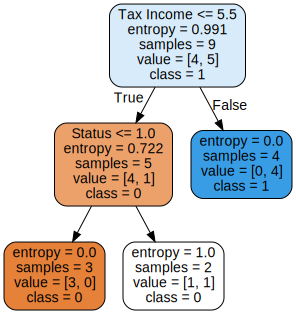

In [ ]:
import graphviz
feature_cols = ['Refund', 'Status', 'Tax Income']
feature_names = X.columns

dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=feature_cols,
                                class_names=["0","1"])
graph = graphviz.Source(dot_data)
graph

CART Decission Tree Algorithm Implementation

In [ ]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 2
Accuracy: 0.50


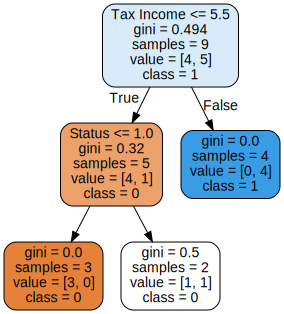

In [ ]:
import graphviz
feature_names = X.columns

dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=feature_cols,
                                class_names=["0","1"])
graph = graphviz.Source(dot_data)
graph

Question 2 : Decission Tree hyperparameter tuning for heart failure data set.

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# load dataset
failure = pd.read_csv("data.csv")
failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#split dataset in features and target variable
feature_cols = ['age', 'high_blood_pressure', 'smoking', 'time','diabetes','sex']
X = failure[feature_cols] # Features
y = failure.DEATH_EVENT # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7555555555555555


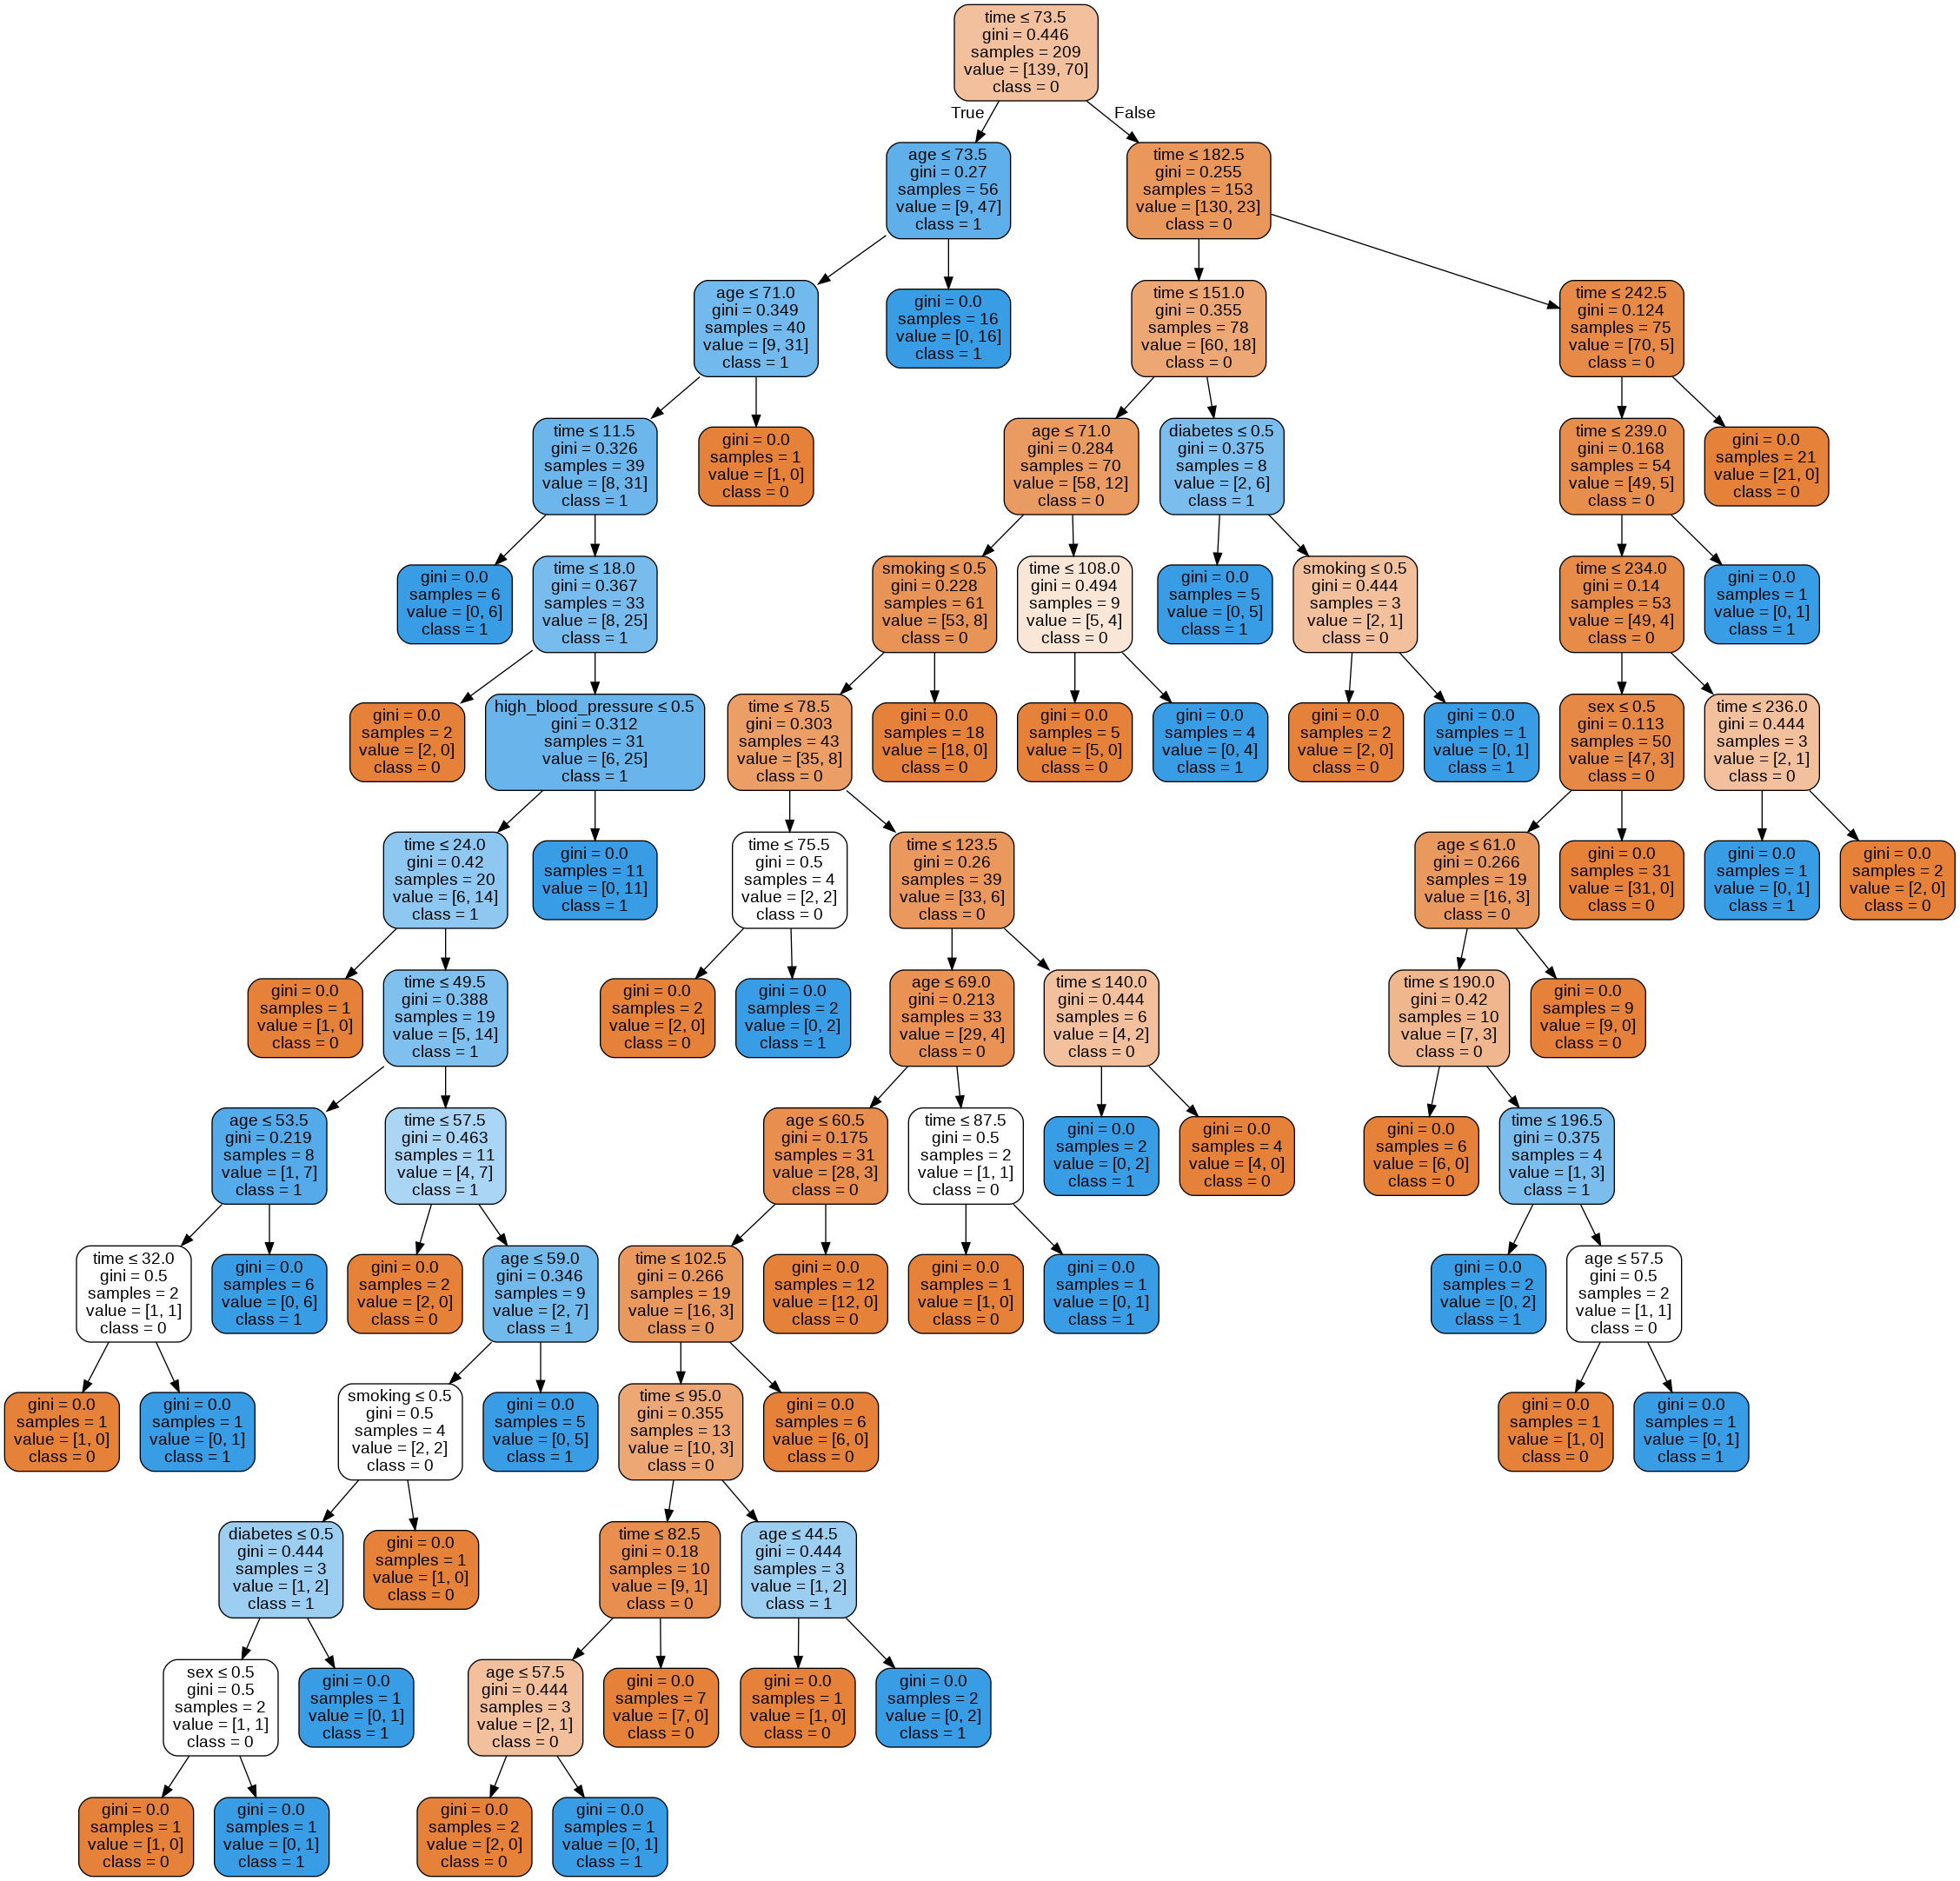

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8222222222222222


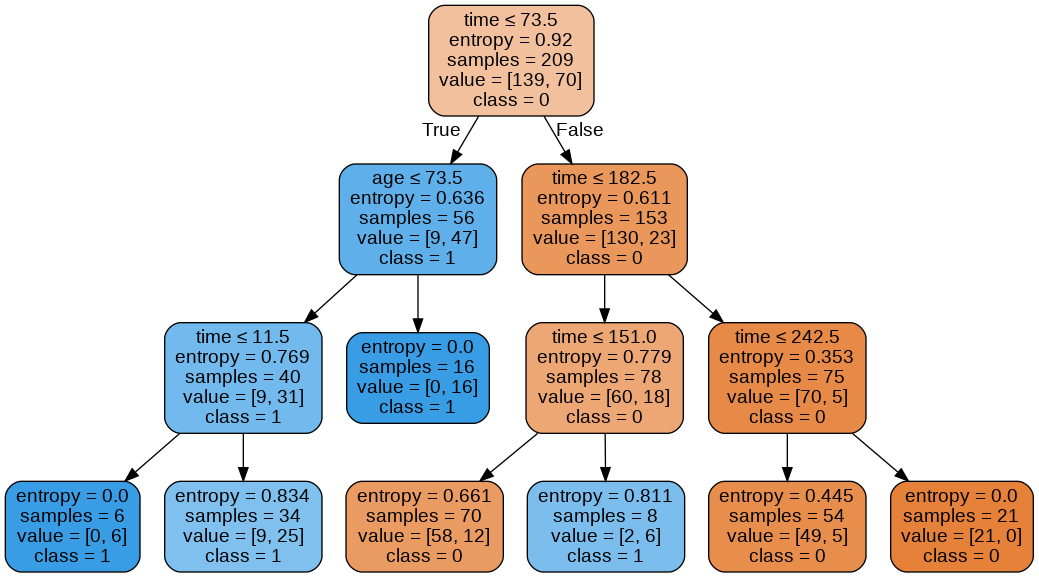

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56  8]
 [ 8 18]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        64
           1       0.69      0.69      0.69        26

    accuracy                           0.82        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.82      0.82      0.82        90

